# # Loan Case Study

## AIM:
This case study aims to identify patterns which indicate if a client has difficulty paying their installments
which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to
risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying
the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',1000)

import warnings
warnings.filterwarnings('ignore')

In [3]:
pre_app = pd.read_csv('previous_application.csv')

In [4]:
pre_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [5]:
pd.DataFrame((pre_app.isnull().sum()*100)/pre_app.shape[0], columns=['% of null values'])

% of null values
SK_ID_PREV                           0.000000
SK_ID_CURR                           0.000000
NAME_CONTRACT_TYPE                   0.000000
AMT_ANNUITY                         22.286665
AMT_APPLICATION                      0.000000
AMT_CREDIT                           0.000060
AMT_DOWN_PAYMENT                    53.636480
AMT_GOODS_PRICE                     23.081773
WEEKDAY_APPR_PROCESS_START           0.000000
HOUR_APPR_PROCESS_START              0.000000
FLAG_LAST_APPL_PER_CONTRACT          0.000000
NFLAG_LAST_APPL_IN_DAY               0.000000
RATE_DOWN_PAYMENT                   53.636480
RATE_INTEREST_PRIMARY               99.643698
RATE_INTEREST_PRIVILEGED            99.643698
NAME_CASH_LOAN_PURPOSE               0.000000
NAME_CONTRACT_STATUS                 0.000000
DAYS_DECISION                        0.000000
NAME_PAYMENT_TYPE                    0.000000
CODE_REJECT_REASON                   0.000000
NAME_TYPE_SUITE                     49.119754
NAME_CLIENT_TYPE                     0.000000
NAME_GOODS_CATEGORY                  0.000000
NAME_PORTFOLIO                       0.000000
NAME_PRODUCT_TYPE                    0.000000
CHANNEL_TYPE                         0.000000
SELLERPLACE_AREA                     0.000000
NAME_SELLER_INDUSTRY                 0.000000
CNT_PAYMENT                         22.286366
NAME_YIELD_GROUP                     0.000000
PRODUCT_COMBINATION                  0.020716
DAYS_FIRST_DRAWING                  40.298129
DAYS_FIRST_DUE                      40.298129
DAYS_LAST_DUE_1ST_VERSION           40.298129
DAYS_LAST_DUE                       40.298129
DAYS_TERMINATION                    40.298129
NFLAG_INSURED_ON_APPROVAL           40.298129

In [6]:
pre_app.drop(['AMT_ANNUITY','AMT_DOWN_PAYMENT','AMT_GOODS_PRICE','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED',
              'NAME_TYPE_SUITE','CNT_PAYMENT','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE',
              'DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL'], axis=1, inplace=True)

In [7]:
pre_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     Consumer loans          17145.0     17145.0   
1     2802425      108129         Cash loans         607500.0    679671.0   
2     2523466      122040         Cash loans         112500.0    136444.5   
3     2819243      176158         Cash loans         450000.0    470790.0   
4     1784265      202054         Cash loans         337500.0    404055.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   SATURDAY                       15   
1                   THURSDAY                       11   
2                    TUESDAY                       11   
3                     MONDAY                        7   
4                   THURSDAY                        9   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE  \
0                           Y                       1                    XAP   
1                           Y                       1                    XNA   
2                           Y                       1                    XNA   
3                           Y                       1                    XNA   
4                           Y                       1                Repairs   

  NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
0             Approved            -73  Cash through the bank   
1             Approved           -164                    XNA   
2             Approved           -301  Cash through the bank   
3             Approved           -512  Cash through the bank   
4              Refused           -781  Cash through the bank   

  CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
0                XAP         Repeater              Mobile            POS   
1                XAP         Repeater                 XNA           Cash   
2                XAP         Repeater                 XNA           Cash   
3                XAP         Repeater                 XNA           Cash   
4                 HC         Repeater                 XNA           Cash   

  NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  \
0               XNA             Country-wide                35   
1            x-sell           Contact center                -1   
2            x-sell  Credit and cash offices                -1   
3            x-sell  Credit and cash offices                -1   
4           walk-in  Credit and cash offices                -1   

  NAME_SELLER_INDUSTRY NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         Connectivity           middle  POS mobile with interest  
1                  XNA       low_action          Cash X-Sell: low  
2                  XNA             high         Cash X-Sell: high  
3                  XNA           middle       Cash X-Sell: middle  
4                  XNA             high         Cash Street: high

In [8]:
pre_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_APPLICATION              1670214 non-null  float64
 4   AMT_CREDIT                   1670213 non-null  float64
 5   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 6   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 7   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 9   NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 10  NAME_CONTRACT_STATUS         1670214 non-null  object 
 11  DAYS_DECISION                1670214 non-null  int64  
 12  NAME_PAYMENT_TYPE            1670214 non-n

In [9]:
pre_app.AMT_CREDIT.mean(), pre_app.AMT_CREDIT.median()

(196114.02121797804, 80541.0)

In [10]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


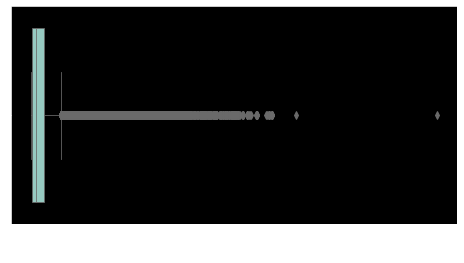

In [11]:
fig = plt.figure(figsize=(8,4))
plt.style.use('dark_background')
sns.boxplot(pre_app.AMT_CREDIT, color='red', palette='Set3', linewidth=0.8)

In [12]:
pre_app.AMT_CREDIT.fillna(pre_app.AMT_CREDIT.median(), inplace=True)

In [13]:
pre_app.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [14]:
pre_app.PRODUCT_COMBINATION.fillna(pre_app.PRODUCT_COMBINATION.mode()[0], inplace=True)

In [15]:
pre_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_APPLICATION              1670214 non-null  float64
 4   AMT_CREDIT                   1670214 non-null  float64
 5   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 6   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 7   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 9   NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 10  NAME_CONTRACT_STATUS         1670214 non-null  object 
 11  DAYS_DECISION                1670214 non-null  int64  
 12  NAME_PAYMENT_TYPE            1670214 non-n

## NEW APPLICATION DATA ANALYSIS

In [16]:
app_data = pd.read_csv('application_data.csv')

In [17]:
app_data.shape

(307511, 122)

In [18]:
app_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [19]:
pd.DataFrame((app_data.isnull().sum()*100)/app_data.shape[0], columns=['% of null values'])

% of null values
SK_ID_CURR                            0.000000
TARGET                                0.000000
NAME_CONTRACT_TYPE                    0.000000
CODE_GENDER                           0.000000
FLAG_OWN_CAR                          0.000000
FLAG_OWN_REALTY                       0.000000
CNT_CHILDREN                          0.000000
AMT_INCOME_TOTAL                      0.000000
AMT_CREDIT                            0.000000
AMT_ANNUITY                           0.003902
AMT_GOODS_PRICE                       0.090403
NAME_TYPE_SUITE                       0.420148
NAME_INCOME_TYPE                      0.000000
NAME_EDUCATION_TYPE                   0.000000
NAME_FAMILY_STATUS                    0.000000
NAME_HOUSING_TYPE                     0.000000
REGION_POPULATION_RELATIVE            0.000000
DAYS_BIRTH                            0.000000
DAYS_EMPLOYED                         0.000000
DAYS_REGISTRATION                     0.000000
DAYS_ID_PUBLISH                       0.000000
OWN_CAR_AGE                          65.990810
FLAG_MOBIL                            0.000000
FLAG_EMP_PHONE                        0.000000
FLAG_WORK_PHONE                       0.000000
FLAG_CONT_MOBILE                      0.000000
FLAG_PHONE                            0.000000
FLAG_EMAIL                            0.000000
OCCUPATION_TYPE                      31.345545
CNT_FAM_MEMBERS                       0.000650
REGION_RATING_CLIENT                  0.000000
REGION_RATING_CLIENT_W_CITY           0.000000
WEEKDAY_APPR_PROCESS_START            0.000000
HOUR_APPR_PROCESS_START               0.000000
REG_REGION_NOT_LIVE_REGION            0.000000
REG_REGION_NOT_WORK_REGION            0.000000
LIVE_REGION_NOT_WORK_REGION           0.000000
REG_CITY_NOT_LIVE_CITY                0.000000
REG_CITY_NOT_WORK_CITY                0.000000
LIVE_CITY_NOT_WORK_CITY               0.000000
ORGANIZATION_TYPE                     0.000000
EXT_SOURCE_1                         56.381073
EXT_SOURCE_2                          0.214626
EXT_SOURCE_3                         19.825307
APARTMENTS_AVG                       50.749729
BASEMENTAREA_AVG                     58.515956
YEARS_BEGINEXPLUATATION_AVG          48.781019
YEARS_BUILD_AVG                      66.497784
COMMONAREA_AVG                       69.872297
ELEVATORS_AVG                        53.295980
ENTRANCES_AVG                        50.348768
FLOORSMAX_AVG                        49.760822
FLOORSMIN_AVG                        67.848630
LANDAREA_AVG                         59.376738
LIVINGAPARTMENTS_AVG                 68.354953
LIVINGAREA_AVG                       50.193326
NONLIVINGAPARTMENTS_AVG              69.432963
NONLIVINGAREA_AVG                    55.179164
APARTMENTS_MODE                      50.749729
BASEMENTAREA_MODE                    58.515956
YEARS_BEGINEXPLUATATION_MODE         48.781019
YEARS_BUILD_MODE                     66.497784
COMMONAREA_MODE                      69.872297
ELEVATORS_MODE                       53.295980
ENTRANCES_MODE                       50.348768
FLOORSMAX_MODE                       49.760822
FLOORSMIN_MODE                       67.848630
LANDAREA_MODE                        59.376738
LIVINGAPARTMENTS_MODE                68.354953
LIVINGAREA_MODE                      50.193326
NONLIVINGAPARTMENTS_MODE             69.432963
NONLIVINGAREA_MODE                   55.179164
APARTMENTS_MEDI                      50.749729
BASEMENTAREA_MEDI                    58.515956
YEARS_BEGINEXPLUATATION_MEDI         48.781019
YEARS_BUILD_MEDI                     66.497784
COMMONAREA_MEDI                      69.872297
ELEVATORS_MEDI                       53.295980
ENTRANCES_MEDI                       50.348768
FLOORSMAX_MEDI                       49.760822
FLOORSMIN_MEDI                       67.848630
LANDAREA_MEDI                        59.376738
LIVINGAPARTMENTS_MEDI                68.354953
LIVINGAREA_MEDI                      50.193326
NONLIVINGAPARTMENTS_MEDI           

In [20]:
app_data.drop(['OWN_CAR_AGE','OCCUPATION_TYPE','EXT_SOURCE_1','EXT_SOURCE_3','APARTMENTS_AVG','BASEMENTAREA_AVG',
              'YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG',
              'FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE',
              'BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE',
              'FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE',
              'NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI',
              'COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI',
              'NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE',
              'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','LIVINGAREA_AVG','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI']
              , axis=1, inplace=True)

In [21]:
app_data.shape

(307511, 65)

In [22]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [23]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0              1.0   
1                 1           1           0              2.0   
2                 1           1           0              1.0   
3                 1           0           0              2.0   
4                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_

In [24]:
# columns to impute missing values
list(app_data.columns[(app_data.isnull().mean()<=5) & (app_data.isnull().mean()>0)])

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

In [25]:
def plot(var):
    fig= plt.figure(figsize=(8,4))
    plt.style.use('dark_background')
    sns.boxplot(app_data[var])

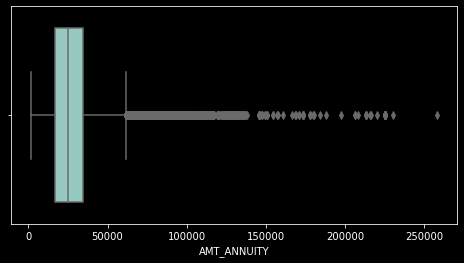

In [26]:
plot('AMT_ANNUITY')

In [27]:
app_data.AMT_ANNUITY.fillna(app_data.AMT_ANNUITY.median(), inplace=True)

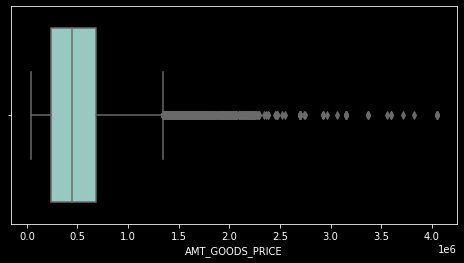

In [28]:
plot('AMT_GOODS_PRICE')

In [29]:
app_data.AMT_GOODS_PRICE.fillna(app_data.AMT_GOODS_PRICE.median(), inplace=True)

In [30]:
app_data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [31]:
app_data.NAME_TYPE_SUITE.fillna(app_data.NAME_TYPE_SUITE.mode()[0], inplace=True)

In [32]:
app_data['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

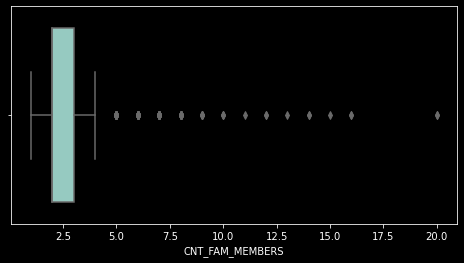

In [33]:
plot('CNT_FAM_MEMBERS')

In [34]:
app_data.CNT_FAM_MEMBERS.fillna(app_data.CNT_FAM_MEMBERS.median(), inplace=True)

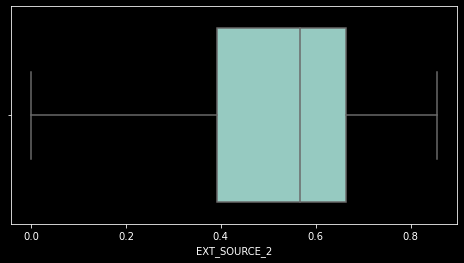

In [35]:
plot('EXT_SOURCE_2')

In [36]:
app_data.EXT_SOURCE_2.value_counts()

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.169134      1
0.213753      1
0.057994      1
0.229146      1
0.336367      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

In [37]:
app_data.EXT_SOURCE_2 = app_data.EXT_SOURCE_2.fillna(app_data.EXT_SOURCE_2.mean(), inplace=True)

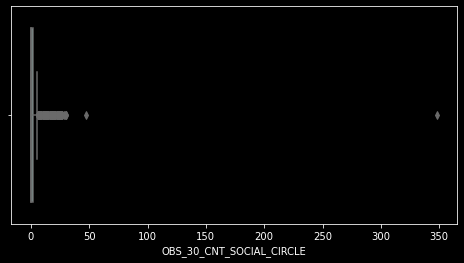

In [38]:
plot('OBS_30_CNT_SOCIAL_CIRCLE')

In [39]:
app_data.OBS_30_CNT_SOCIAL_CIRCLE = app_data.OBS_30_CNT_SOCIAL_CIRCLE.fillna(app_data.OBS_30_CNT_SOCIAL_CIRCLE.median(), 
                                                                             inplace=True)

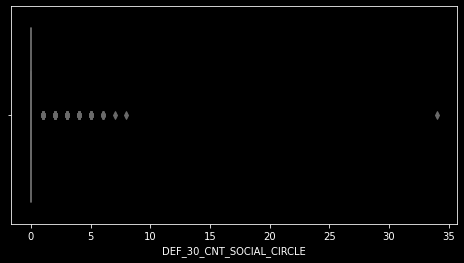

In [40]:
plot('DEF_30_CNT_SOCIAL_CIRCLE')

In [41]:
app_data.DEF_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
8.0          1
34.0         1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [42]:
app_data.DEF_30_CNT_SOCIAL_CIRCLE = app_data.DEF_30_CNT_SOCIAL_CIRCLE.fillna(app_data.DEF_30_CNT_SOCIAL_CIRCLE.median(), inplace=True)

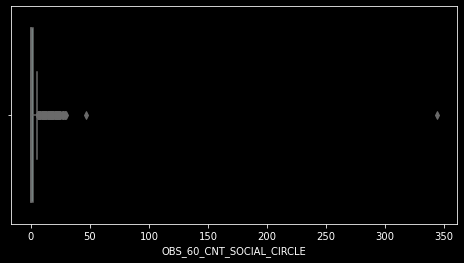

In [43]:
plot('OBS_60_CNT_SOCIAL_CIRCLE')

In [44]:
app_data.OBS_60_CNT_SOCIAL_CIRCLE = app_data.OBS_60_CNT_SOCIAL_CIRCLE.fillna(app_data.OBS_60_CNT_SOCIAL_CIRCLE.median(), inplace=True)

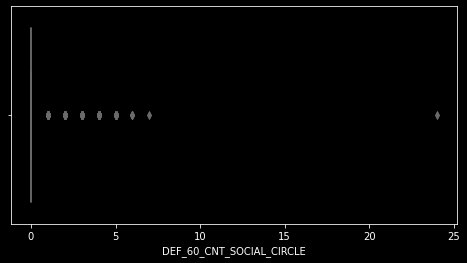

In [45]:
plot('DEF_60_CNT_SOCIAL_CIRCLE')

In [46]:
app_data.DEF_60_CNT_SOCIAL_CIRCLE = app_data.DEF_60_CNT_SOCIAL_CIRCLE.fillna(app_data.DEF_60_CNT_SOCIAL_CIRCLE.median(), inplace=True)

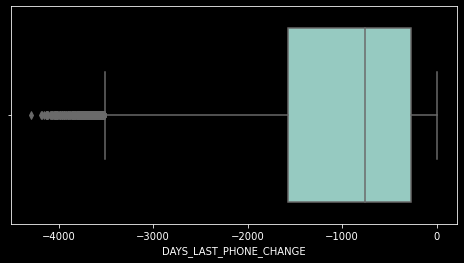

In [47]:
plot('DAYS_LAST_PHONE_CHANGE')

In [48]:
app_data.DAYS_LAST_PHONE_CHANGE = app_data.DAYS_LAST_PHONE_CHANGE.fillna(app_data.DAYS_LAST_PHONE_CHANGE.median(), inplace=True)

In [49]:
# Making gender more readable
app_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [50]:
# Droppping rows with CODE_GENDER = XNA since the rows are very less
new_app_data = app_data[app_data['CODE_GENDER']!='XNA']

In [51]:
new_app_data['CODE_GENDER'].replace({'F':'Female','M':'Male'}, inplace=True)

In [52]:
new_app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans        Male            N   
1      100003       0         Cash loans      Female            N   
2      100004       0    Revolving loans        Male            Y   
3      100006       0         Cash loans      Female            N   
4      100007       0         Cash loans        Male            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0              1.0   
1                 1           1           0              2.0   
2                 1           1           0              1.0   
3                 1           0           0              2.0   
4                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_

### Binning Numerical Variables For Analysis

In [53]:
new_app_data['AMT_INCOME_TOTAL'].quantile([0,0.1,0.3,0.5,0.6,0.8,1.0])

0.0        25650.0
0.1        81000.0
0.3       112500.0
0.5       147150.0
0.6       162000.0
0.8       225000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [54]:
#creating a new categorical variable based on above numerical column for analysis
new_app_data['INCOME_GROUP'] = pd.qcut(new_app_data['AMT_INCOME_TOTAL'], q =[0,0.1,0.3,0.6,0.8,1], 
                                        labels = ['Very Low','Low','Medium','High','Very High'])

In [55]:
new_app_data['INCOME_GROUP'] = new_app_data['INCOME_GROUP'].astype('object')   #Converting into categorical column type

In [56]:
# Binning Days Birth
abs(new_app_data['DAYS_BIRTH']).quantile([0,0.1,0.3,0.6,0.8,1])

0.0     7489.0
0.1    10284.6
0.3    13140.0
0.6    17220.0
0.8    20474.0
1.0    25229.0
Name: DAYS_BIRTH, dtype: float64

In [57]:
# Creating a column age using days_birth
new_app_data['AGE'] = abs(new_app_data['DAYS_BIRTH'])//365.25

In [58]:
new_app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans        Male            N   
1      100003       0         Cash loans      Female            N   
2      100004       0    Revolving loans        Male            Y   
3      100006       0         Cash loans      Female            N   
4      100007       0         Cash loans        Male            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0              1.0   
1                 1           1           0              2.0   
2                 1           1           0              1.0   
3                 1           0           0              2.0   
4                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_

In [59]:
new_app_data.AGE.describe()

count    307507.000000
mean         43.405223
std          11.945763
min          20.000000
25%          33.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

In [60]:
# Now converting this age into a categorical column via binning for analysis
## Since the AGE varies from 20 to 69, we can create bins of 5 years starting from 20 to 70
new_app_data['AGE_GROUP'] = pd.cut(new_app_data['AGE'],bins=np.arange(20,71,5))
new_app_data['AGE_GROUP'] = new_app_data['AGE_GROUP'].astype('object')

In [61]:
new_app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans        Male            N   
1      100003       0         Cash loans      Female            N   
2      100004       0    Revolving loans        Male            Y   
3      100006       0         Cash loans      Female            N   
4      100007       0         Cash loans        Male            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0              1.0   
1                 1           1           0              2.0   
2                 1           1           0              1.0   
3                 1           0           0              2.0   
4                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_

In [62]:
#app0_data = app_data[app_data.TARGET==0]
#app1_data = app_data[app_data.TARGET==1]

In [63]:
#app0_data.shape, app1_data.shape

In [64]:
# Adding one more column
new_app_data['CREDIT_INCOME_RATIO'] = round((new_app_data['AMT_CREDIT']/new_app_data['AMT_INCOME_TOTAL']))

In [65]:
new_app_data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans        Male            N   
1           100003       0         Cash loans      Female            N   
2           100004       0    Revolving loans        Male            Y   
3           100006       0         Cash loans      Female            N   
4           100007       0         Cash loans        Male            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans        Male            N   
307507      456252       0         Cash loans      Female            N   
307508      456253       0         Cash loans      Female            N   
307509      456254       1         Cash loans      Female            N   
307510      456255       0         Cash loans      Female            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

In [66]:
# Getting the percentage of social circles who defaulted
new_app_data['SOCIAL_CIRCLE_30_DAYS_DEF_PERC'] = new_app_data['DEF_30_CNT_SOCIAL_CIRCLE']/new_app_data['OBS_30_CNT_SOCIAL_CIRCLE']
new_app_data['SOCIAL_CIRCLE_60_DAYS_DEF_PERC'] = new_app_data['DEF_60_CNT_SOCIAL_CIRCLE']/new_app_data['OBS_60_CNT_SOCIAL_CIRCLE']

In [67]:
new_app_data.TARGET.value_counts(normalize=True)*100

0    91.927013
1     8.072987
Name: TARGET, dtype: float64

In [68]:
# Now that the feature engineering is done, lets move onto our target variable and analyze it
px.pie(new_app_data.TARGET.value_counts(normalize=True)*100, values='TARGET', names = ['Non Default(Target=0)', 'Default(Target=1)'],
      title = 'TARGET Variable - DEFAULTER Vs NONDEFAULTER')

In [69]:
# From the remaining columns about 30 are selected based on their description and relevance with problem statement 
#for further analysis
FinalColumns = ['SK_ID_CURR','TARGET','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','INCOME_GROUP','AGE_GROUP','AMT_CREDIT','AMT_INCOME_TOTAL',
'CREDIT_INCOME_RATIO','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_EMPLOYED',
'DAYS_REGISTRATION','FLAG_EMAIL', 'CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY','ORGANIZATION_TYPE','SOCIAL_CIRCLE_30_DAYS_DEF_PERC',
'SOCIAL_CIRCLE_60_DAYS_DEF_PERC','NAME_CONTRACT_TYPE','AMT_ANNUITY','REGION_RATING_CLIENT','AMT_GOODS_PRICE']

In [70]:
new_app_data = new_app_data[FinalColumns]

In [71]:
new_app_data.shape

(307507, 26)

In [72]:
# Splitting the df into two different dataframes
newapp0 = new_app_data[new_app_data.TARGET==0]             # Dataframe with all data related to non-defaulters
newapp1 = new_app_data[new_app_data.TARGET==1]             # Dataframe with all data related to defaulters

In [73]:
newapp0.shape, newapp1.shape

((282682, 26), (24825, 26))

### Univariate analysis for each of these datasets

#### Function to plot univariate numerical variables

In [74]:
def unicomp(var):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
    sns.distplot(a=newapp0[var], ax=ax1)
    ax1.set_title(f'Distribution of {var} for non-defaulters')
    plt.xlabel(var)
    
    sns.distplot(a=newapp1[var], ax=ax2)
    ax2.set_title(f'Distribution of {var} for defaulters')
    plt.xlabel(var)
    plt.show()

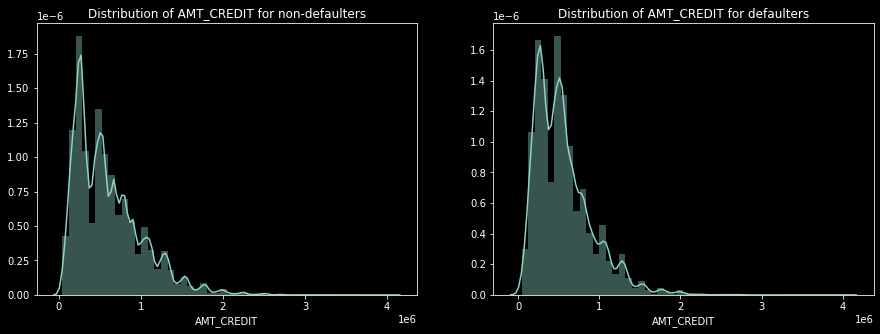

In [75]:
unicomp('AMT_CREDIT')

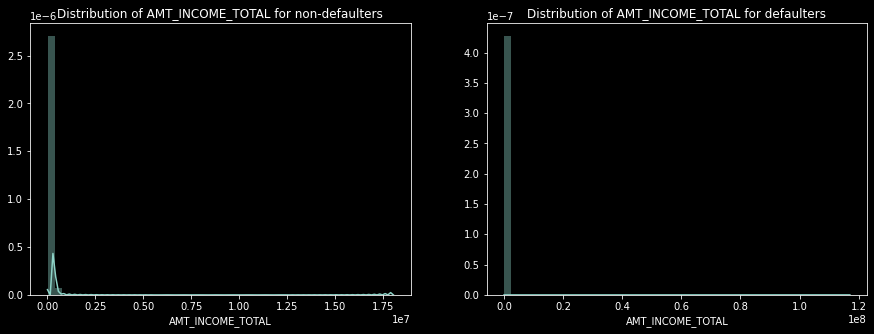

In [76]:
unicomp('AMT_INCOME_TOTAL')

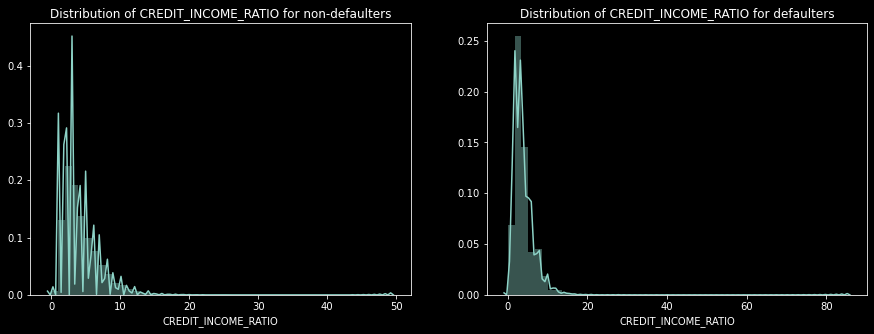

In [77]:
unicomp('CREDIT_INCOME_RATIO')

Credit income ratio the ratio of AMT_CREDIT/AMT_INCOME_TOTAL.
Although there doesn't seem to be a clear distiguish between the group which defaulted vs the group which didn't when compared using the ratio, we can see that when the CREDIT_INCOME_RATIO is more than 50, people default

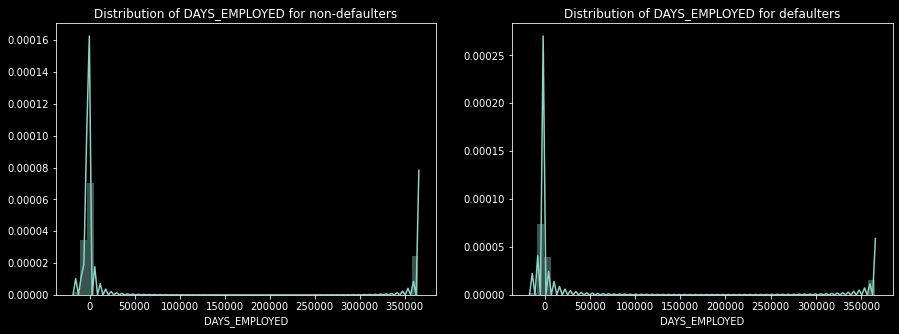

In [78]:
unicomp('DAYS_EMPLOYED')

In [79]:
new_app_data.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52600
4.0      24696
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

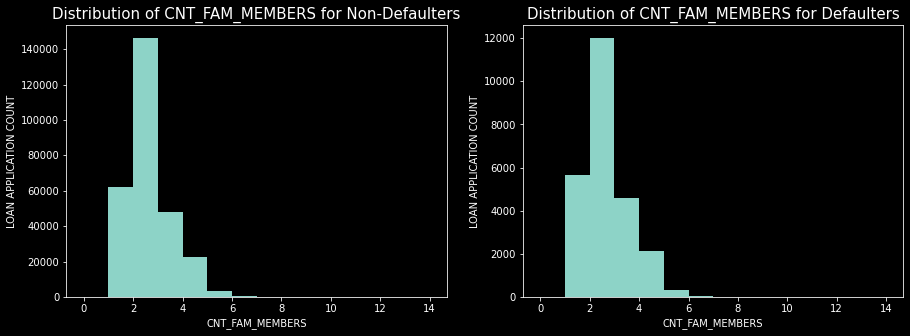

In [80]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
newapp0['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title('Distribution of CNT_FAM_MEMBERS for Non-Defaulters',fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')

plt.subplot(1, 2, 2)
newapp1['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title(f'Distribution of CNT_FAM_MEMBERS for Defaulters',fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')  

plt.show()

### We can see that a family of 3 apply for loan more often than other size families

#### Functions to plot univariate categorical variables

In [81]:
def unicat(var):
    plt.style.use('dark_background')
    sns.despine
    
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,6))
    
    sns.countplot(x=var, data=newapp0, ax=ax1)
    ax1.set_title(f'distribution of values in {var} among non-defaulters')
    ax1.set_ylabel('total loan app. counts')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=35, ha='right')     # modifying x tick labels
    
    # Getting annotations for ax1 plot for easier comparison between defaulters and non-defaulters
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(newapp0))*100), (p.get_x()+0.1, p.get_height()+50))
    
    sns.countplot(x=var, data=newapp1, ax=ax2)
    ax2.set_title(f'distribution of values in {var} among defaulters')
    ax2.set_ylabel('total loan app. counts')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=35, ha='right')      # modifying x tick labels
    
    # Getting annotations for ax1 plot for easier comparison between defaulters and non-defaulters
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(newapp1))*100), (p.get_x()+0.1, p.get_height()+50))
    
    plt.show()
    

In [82]:
newapp0.select_dtypes(include='object').columns         # Checking categorical columns in newapp0 (non-defaulters)

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'INCOME_GROUP',
       'AGE_GROUP', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE',
       'SOCIAL_CIRCLE_30_DAYS_DEF_PERC', 'SOCIAL_CIRCLE_60_DAYS_DEF_PERC',
       'NAME_CONTRACT_TYPE'],
      dtype='object')

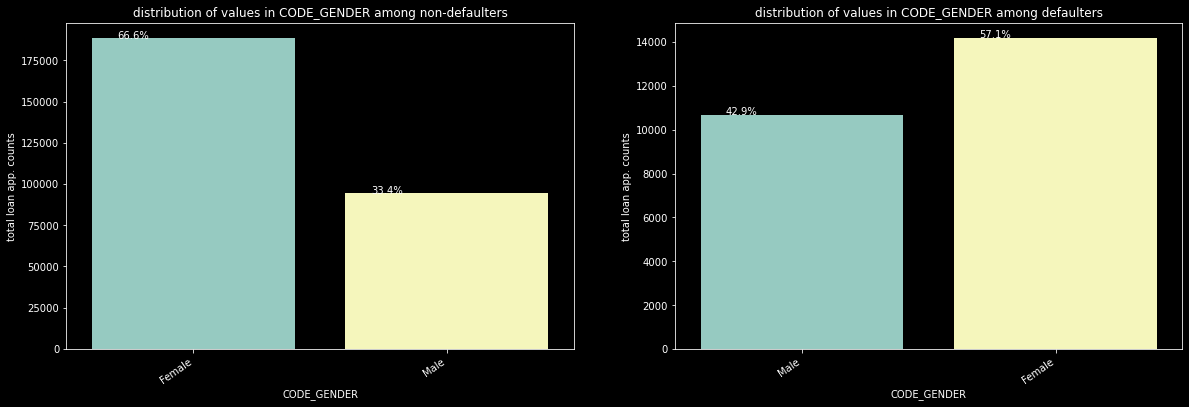

In [83]:
unicat('CODE_GENDER')

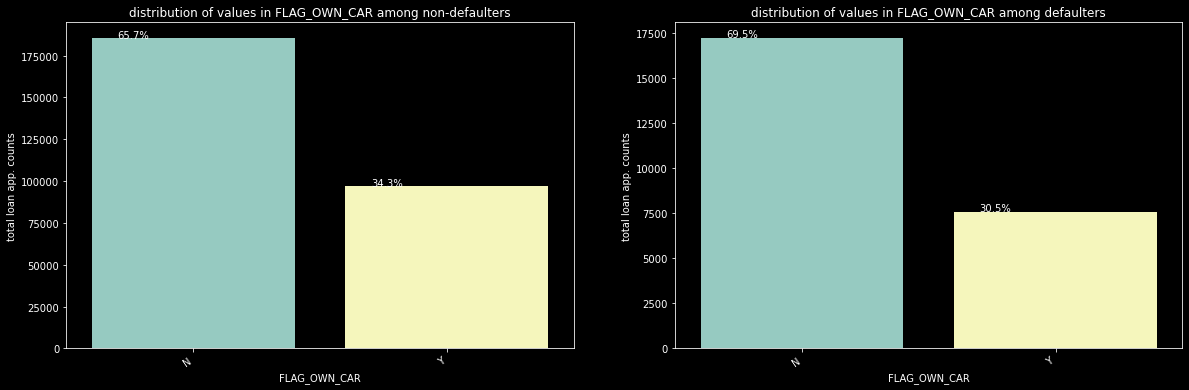

In [84]:
unicat('FLAG_OWN_CAR')

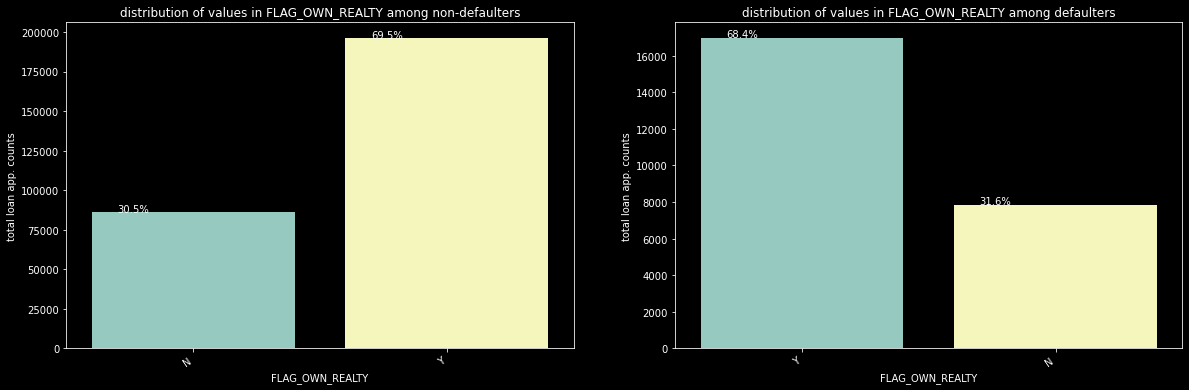

In [85]:
unicat('FLAG_OWN_REALTY')

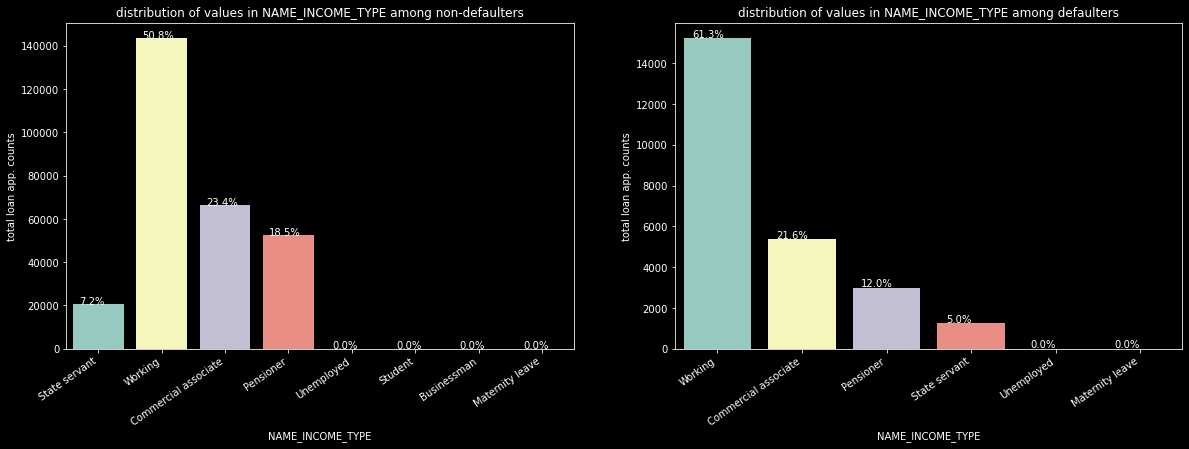

In [86]:
unicat('NAME_INCOME_TYPE')

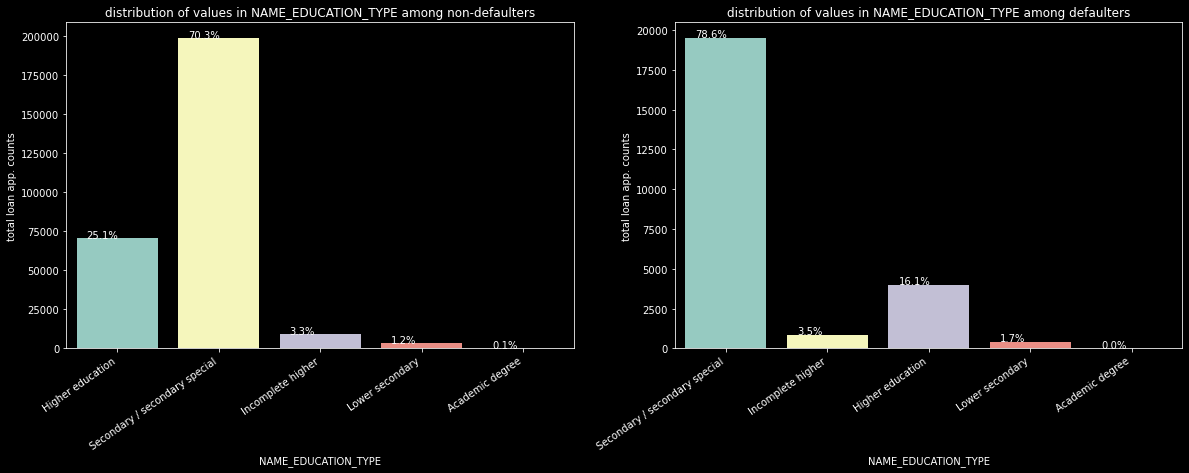

In [87]:
unicat('NAME_EDUCATION_TYPE')

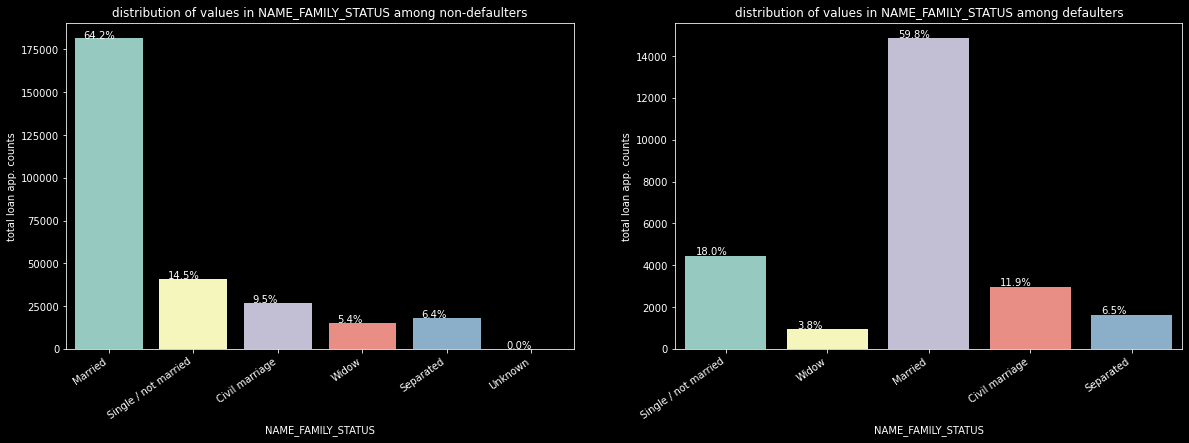

In [88]:
unicat('NAME_FAMILY_STATUS')

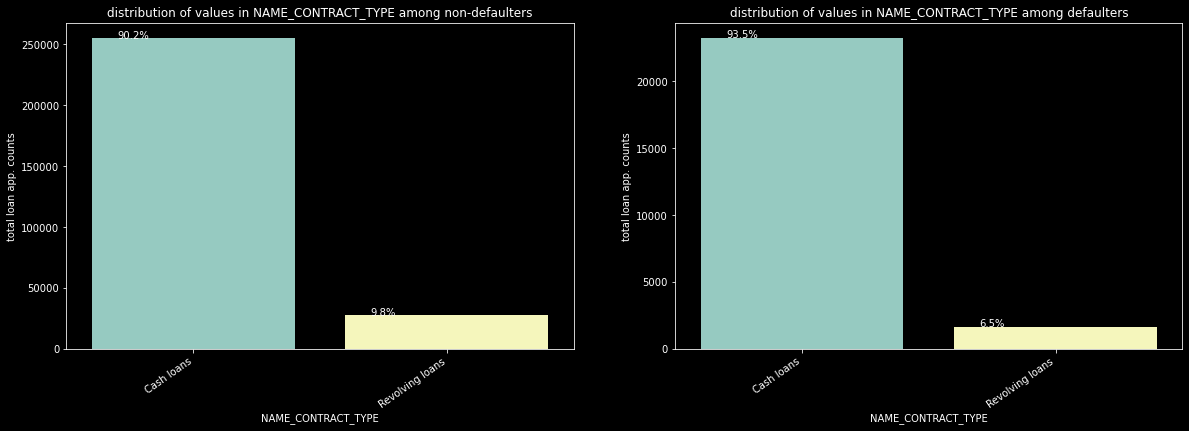

In [89]:
unicat('NAME_CONTRACT_TYPE')

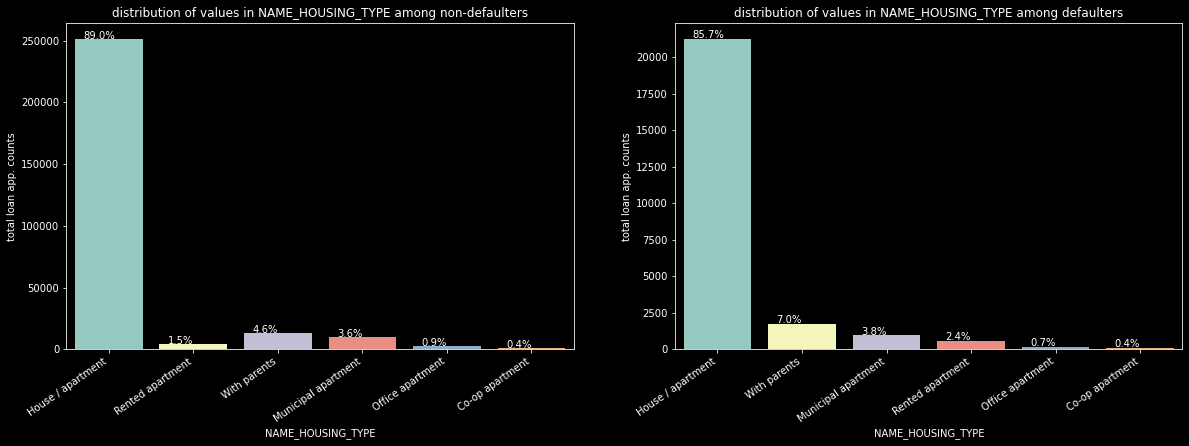

In [90]:
unicat('NAME_HOUSING_TYPE')

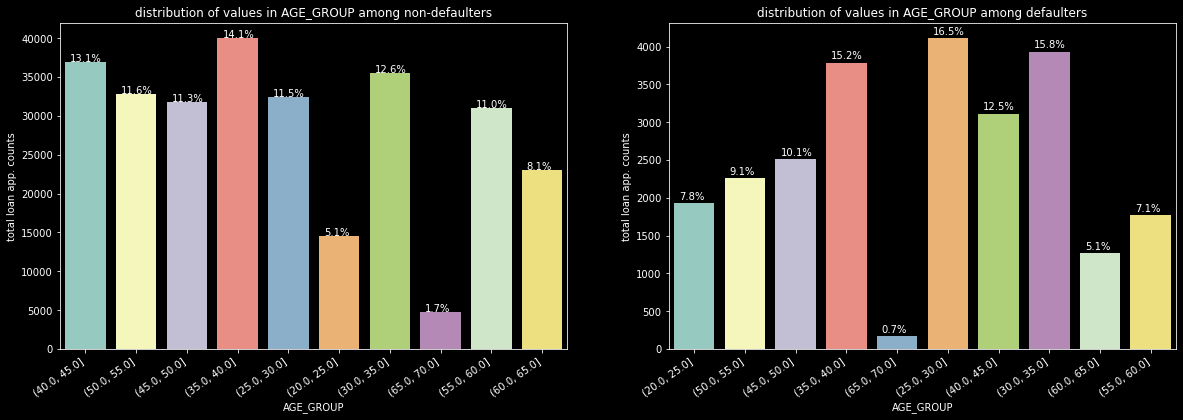

In [91]:
unicat('AGE_GROUP')

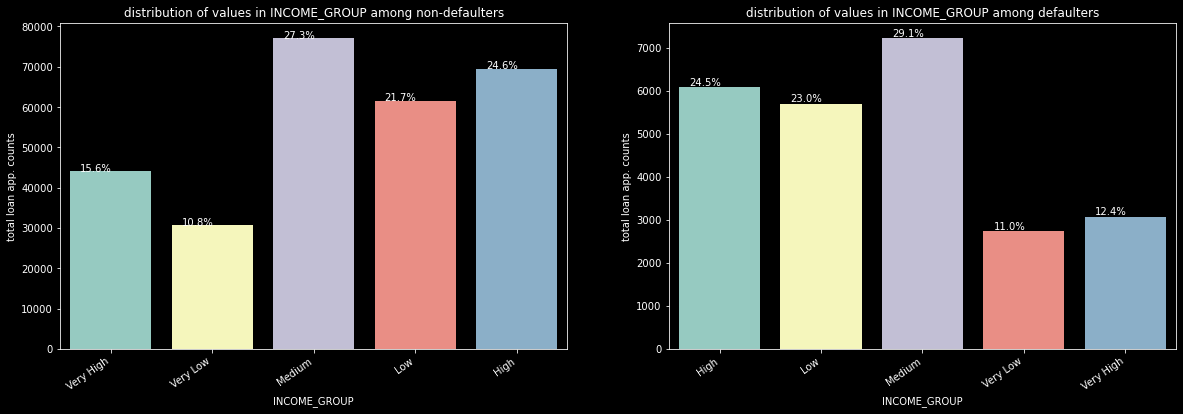

In [92]:
unicat('INCOME_GROUP')

### Getting the top 10 correlations of the selected columns in both the datasets

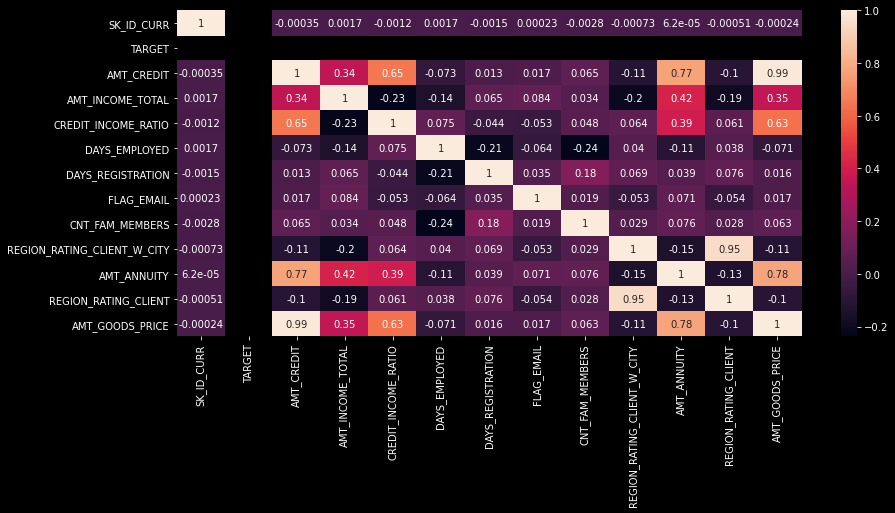

In [93]:
# newapp0
corr_map0 = newapp0.corr()
fig = plt.figure(figsize=(14,6))
sns.heatmap(corr_map0, annot=True)

In [94]:
corr_df = corr_map0.where(np.triu(np.ones(corr_map0.shape), k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns = ['Column1', 'Column2', 'Correlation']
corr_df.dropna(subset=['Correlation'], inplace=True)
corr_df['Abs Correlation'] = abs(corr_df['Correlation'])
corr_df = corr_df.sort_values(by='Abs Correlation', ascending=False)
corr_df.head(10)                 # Getting top 10 correlation in newapp0 (non-defaulters)

Column1                      Column2  Correlation  \
158       AMT_GOODS_PRICE                   AMT_CREDIT     0.987024   
152  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY     0.950148   
166       AMT_GOODS_PRICE                  AMT_ANNUITY     0.776421   
132           AMT_ANNUITY                   AMT_CREDIT     0.771296   
54    CREDIT_INCOME_RATIO                   AMT_CREDIT     0.648589   
160       AMT_GOODS_PRICE          CREDIT_INCOME_RATIO     0.628732   
133           AMT_ANNUITY             AMT_INCOME_TOTAL     0.418949   
134           AMT_ANNUITY          CREDIT_INCOME_RATIO     0.391498   
159       AMT_GOODS_PRICE             AMT_INCOME_TOTAL     0.349425   
41       AMT_INCOME_TOTAL                   AMT_CREDIT     0.342801   

     Abs Correlation  
158         0.987024  
152         0.950148  
166         0.776421  
132         0.771296  
54          0.648589  
160         0.628732  
133         0.418949  
134         0.391498  
159         0.349425  
41          0.342801

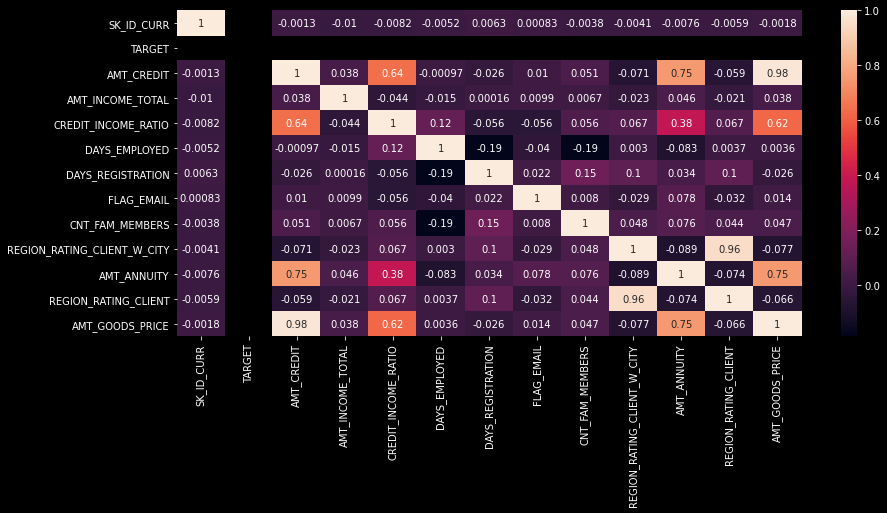

In [95]:
# newapp1
corr_map1 = newapp1.corr()
fig = plt.figure(figsize=(14,6))
sns.heatmap(corr_map1, annot=True)

In [96]:
corr_df2 = corr_map1.where(np.triu(np.ones(corr_map1.shape), k=1).astype(np.bool)).unstack().reset_index()
corr_df2.columns = ['Column1', 'Column2', 'Correlation']
corr_df2.dropna(subset=['Correlation'], inplace=True)
corr_df2['Abs Correlation'] = abs(corr_df2['Correlation'])
corr_df2 = corr_df2.sort_values(by='Abs Correlation', ascending=False)
corr_df2.head(10)     # Getting top 10 correlations for defaulters

Column1                      Column2  Correlation  \
158       AMT_GOODS_PRICE                   AMT_CREDIT     0.982783   
152  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY     0.956637   
166       AMT_GOODS_PRICE                  AMT_ANNUITY     0.752295   
132           AMT_ANNUITY                   AMT_CREDIT     0.752195   
54    CREDIT_INCOME_RATIO                   AMT_CREDIT     0.639744   
160       AMT_GOODS_PRICE          CREDIT_INCOME_RATIO     0.623100   
134           AMT_ANNUITY          CREDIT_INCOME_RATIO     0.381298   
83      DAYS_REGISTRATION                DAYS_EMPLOYED    -0.188929   
109       CNT_FAM_MEMBERS                DAYS_EMPLOYED    -0.186561   
110       CNT_FAM_MEMBERS            DAYS_REGISTRATION     0.145828   

     Abs Correlation  
158         0.982783  
152         0.956637  
166         0.752295  
132         0.752195  
54          0.639744  
160         0.623100  
134         0.381298  
83          0.188929  
109         0.186561  
110         0.145828

### Bivariate Numerical Variable analysis

In [97]:
newapp0.select_dtypes(['int', 'float']).columns        # Getting numerical columns

Index(['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'CREDIT_INCOME_RATIO',
       'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE'],
      dtype='object')

In [98]:
def binumvar(var1, var2):
    plt.style.use('dark_background')
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
    
    sns.scatterplot(x=var1, y=var2, data=newapp0, ax=ax1)
    ax1.set_title(f'{var1} vs {var2} for non-defaulters')
    
    sns.scatterplot(x=var1, y=var2, data=newapp1, ax=ax2)
    ax2.set_title(f'{var1} vs {var2} for defaulters')
    
    plt.show()

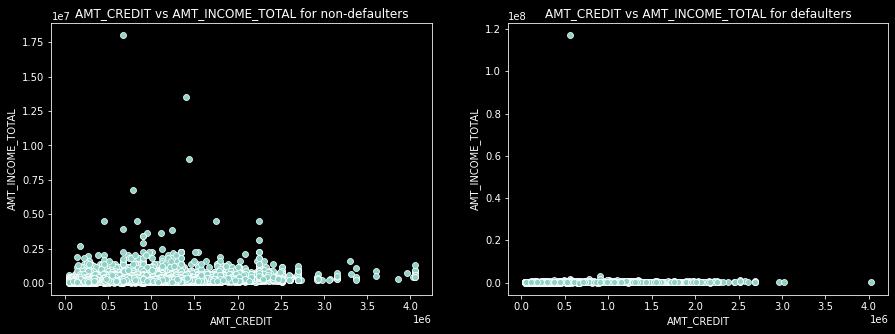

In [99]:
binumvar('AMT_CREDIT','AMT_INCOME_TOTAL')

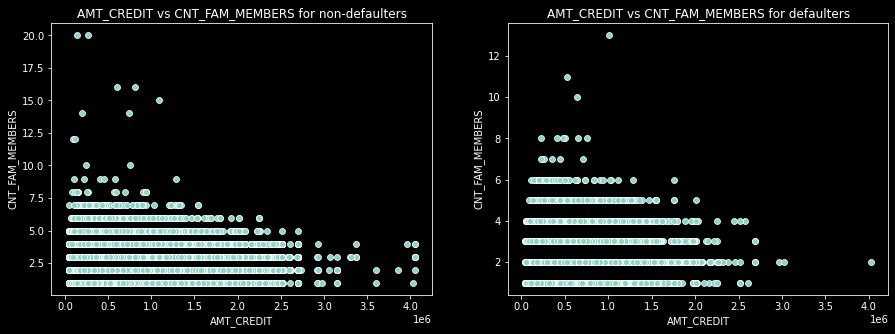

In [100]:
binumvar('AMT_CREDIT', 'CNT_FAM_MEMBERS')

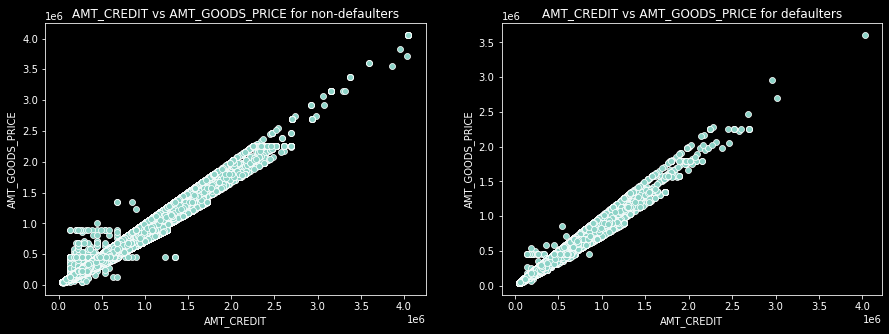

In [101]:
binumvar('AMT_CREDIT', 'AMT_GOODS_PRICE')

### Data Analysis on previous application data

In [102]:
pre_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     Consumer loans          17145.0     17145.0   
1     2802425      108129         Cash loans         607500.0    679671.0   
2     2523466      122040         Cash loans         112500.0    136444.5   
3     2819243      176158         Cash loans         450000.0    470790.0   
4     1784265      202054         Cash loans         337500.0    404055.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   SATURDAY                       15   
1                   THURSDAY                       11   
2                    TUESDAY                       11   
3                     MONDAY                        7   
4                   THURSDAY                        9   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE  \
0                           Y                       1                    XAP   
1                           Y                       1                    XNA   
2                           Y                       1                    XNA   
3                           Y                       1                    XNA   
4                           Y                       1                Repairs   

  NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
0             Approved            -73  Cash through the bank   
1             Approved           -164                    XNA   
2             Approved           -301  Cash through the bank   
3             Approved           -512  Cash through the bank   
4              Refused           -781  Cash through the bank   

  CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
0                XAP         Repeater              Mobile            POS   
1                XAP         Repeater                 XNA           Cash   
2                XAP         Repeater                 XNA           Cash   
3                XAP         Repeater                 XNA           Cash   
4                 HC         Repeater                 XNA           Cash   

  NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  \
0               XNA             Country-wide                35   
1            x-sell           Contact center                -1   
2            x-sell  Credit and cash offices                -1   
3            x-sell  Credit and cash offices                -1   
4           walk-in  Credit and cash offices                -1   

  NAME_SELLER_INDUSTRY NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         Connectivity           middle  POS mobile with interest  
1                  XNA       low_action          Cash X-Sell: low  
2                  XNA             high         Cash X-Sell: high  
3                  XNA           middle       Cash X-Sell: middle  
4                  XNA             high         Cash Street: high

In [103]:
# Deleting all the columns with null-value > 5% using loc function
pre_app = pre_app.loc[:, pre_app.isnull().mean()<=0.05]
pre_app.shape

(1670214, 23)

### Univariate Categorical Analysis

In [104]:
def univar2(var):
    plt.style.use('dark_background')
    plt.figure(figsize=(15,5))
    sns.countplot(x=var, data=pre_app, hue='NAME_CONTRACT_STATUS')
    plt.title(f'Distribution of {var} in previous application')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [105]:
pre_app.select_dtypes(['object']).columns                # Selecting categorical columns

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

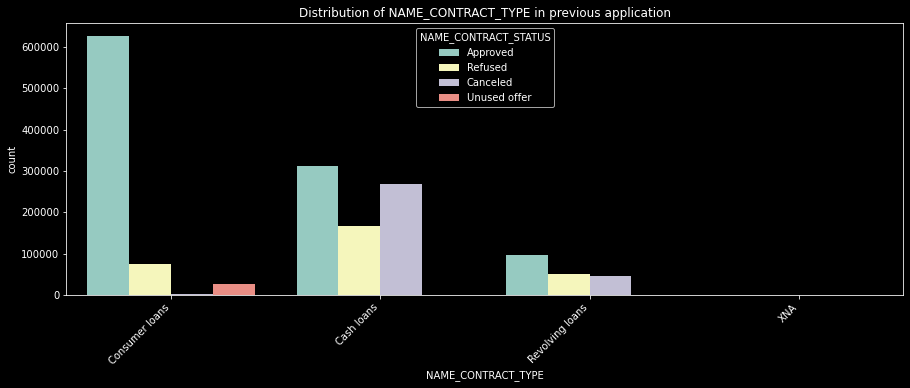

In [106]:
univar2('NAME_CONTRACT_TYPE')

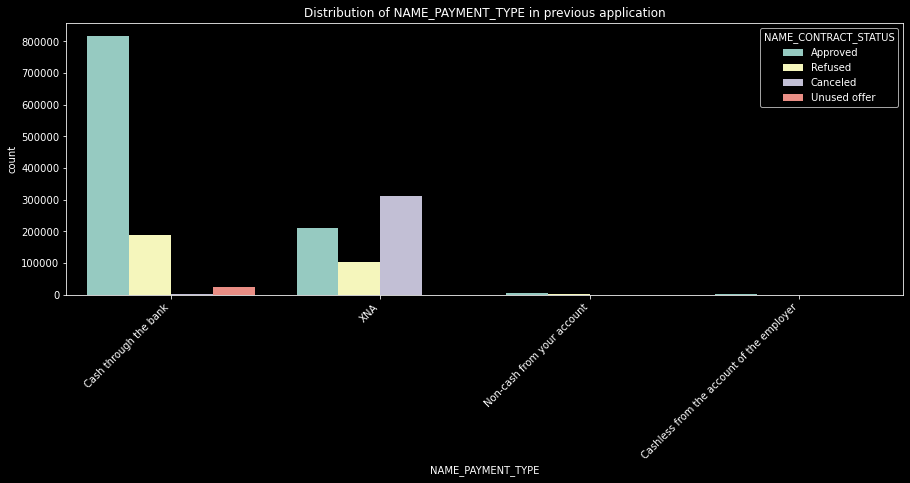

In [107]:
univar2('NAME_PAYMENT_TYPE')

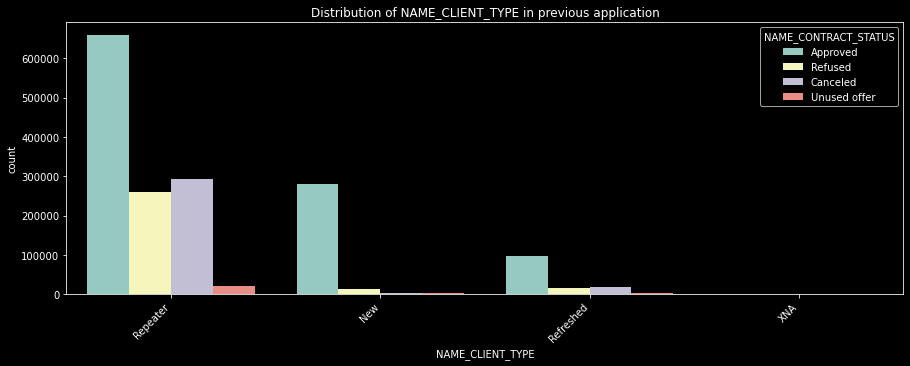

In [108]:
univar2('NAME_CLIENT_TYPE')

In [109]:
#univar2('NAME_GOODS_CATEGORY')

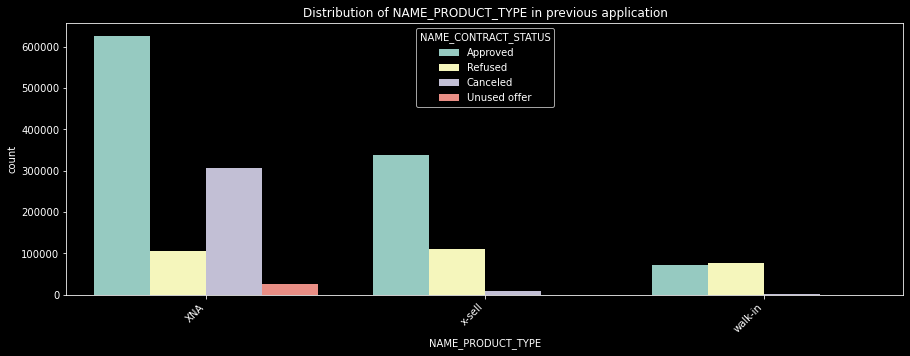

In [110]:
univar2('NAME_PRODUCT_TYPE')

### Checking the correlation in the Previous application dataset

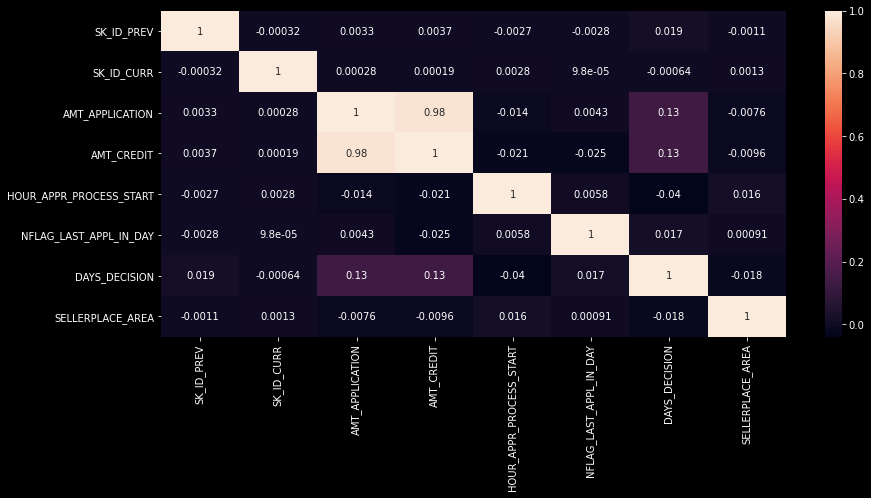

In [111]:
pre_corr = pre_app.corr()
plt.figure(figsize=(14,6))
sns.heatmap(pre_corr, annot=True)

In [112]:
# Getting top 10 correlation on previous_application dataset
corr_df2 = pre_corr.where(np.triu(np.ones(pre_corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df2.columns=['Column1','Column2','Correlation']
corr_df2.dropna(subset=['Correlation'],inplace=True)
corr_df2['Abs_Correlation']=corr_df2['Correlation'].abs()
corr_df2 = corr_df2.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df2.head(10)

Column1                  Column2  Correlation  \
26               AMT_CREDIT          AMT_APPLICATION     0.975824   
51            DAYS_DECISION               AMT_CREDIT     0.133763   
50            DAYS_DECISION          AMT_APPLICATION     0.133660   
52            DAYS_DECISION  HOUR_APPR_PROCESS_START    -0.039962   
43   NFLAG_LAST_APPL_IN_DAY               AMT_CREDIT    -0.025179   
35  HOUR_APPR_PROCESS_START               AMT_CREDIT    -0.021039   
48            DAYS_DECISION               SK_ID_PREV     0.019100   
62         SELLERPLACE_AREA            DAYS_DECISION    -0.018382   
53            DAYS_DECISION   NFLAG_LAST_APPL_IN_DAY     0.016555   
60         SELLERPLACE_AREA  HOUR_APPR_PROCESS_START     0.015671   

    Abs_Correlation  
26         0.975824  
51         0.133763  
50         0.133660  
52         0.039962  
43         0.025179  
35         0.021039  
48         0.019100  
62         0.018382  
53         0.016555  
60         0.015671

### Univariate numerical variable analysis in previous_application data

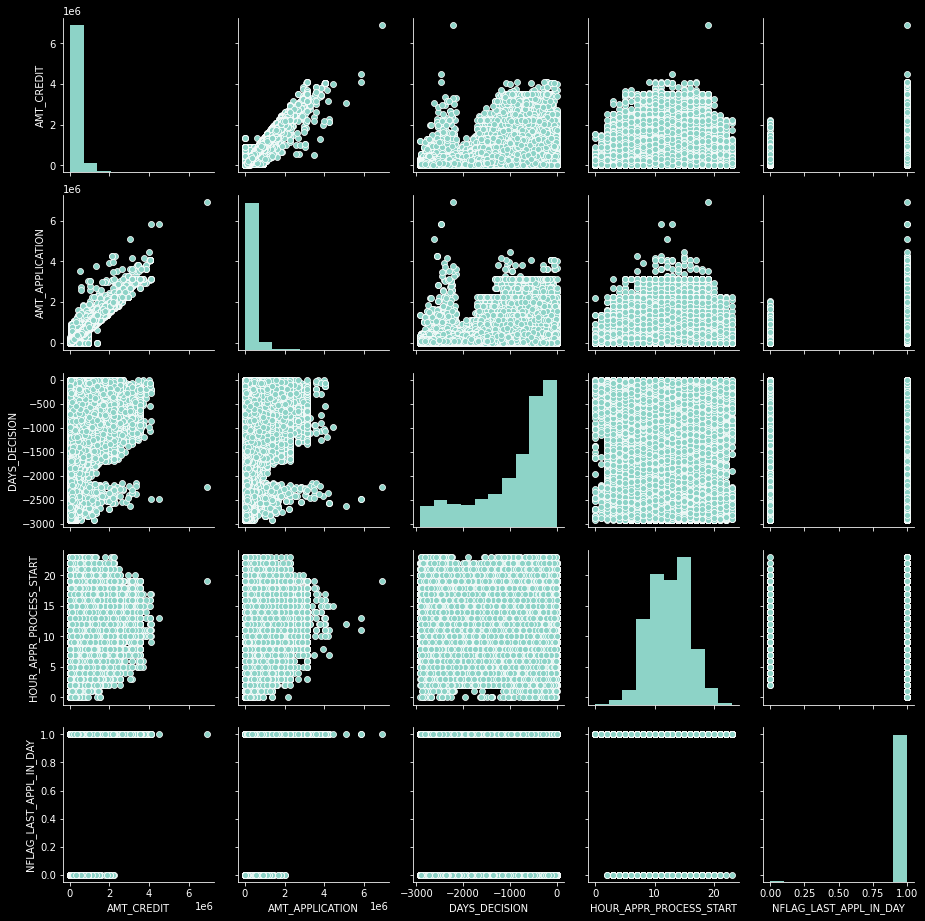

In [113]:
# Plotting the relationships between highly correlated numerical columns  # A great thought process indeed
sns.pairplot(pre_app[['AMT_CREDIT','AMT_APPLICATION','DAYS_DECISION','HOUR_APPR_PROCESS_START','NFLAG_LAST_APPL_IN_DAY']])

### Categorical vs Numerical variables analysis on previous application dataset

In [136]:
def catnum(cat, num):
    plt.style.use('ggplot')
    sns.despine
    fig, ax = plt.subplots(1,1, figsize=(10,8))
    sns.boxenplot(x=cat, y=num, data=pre_app, ax=ax)
    
    ax.set_title(f'{cat} vs {num}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
    plt.show()
    

In [137]:
pre_app.select_dtypes(['int64', 'float64']).columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_APPLICATION', 'AMT_CREDIT',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION',
       'SELLERPLACE_AREA'],
      dtype='object')

In [138]:
pre_app.select_dtypes(['object']).columns

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

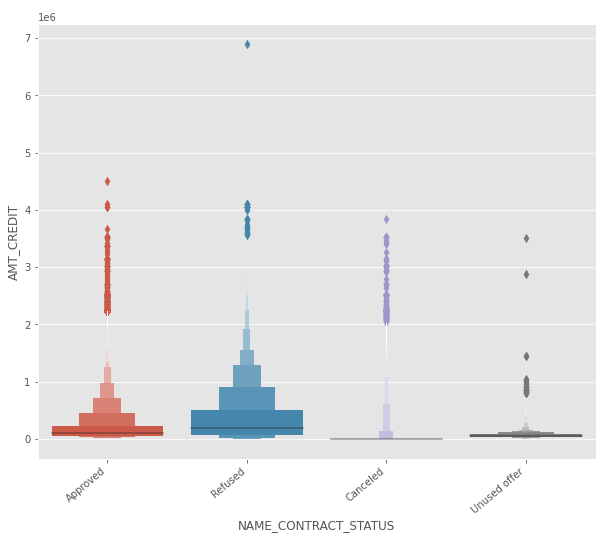

In [139]:
#by-varient analysis of Contract status and Final credit amount disbursed to the customer previously, after approval
catnum('NAME_CONTRACT_STATUS', 'AMT_CREDIT')

### Now merging the files and analyzing the data

In [142]:
# Merging (not concatenating) the files to do some analysis using pd.merge() function
merged_data = pd.merge(left=new_app_data, right=pre_app, how='left', on=['SK_ID_CURR'])

In [143]:
merged_data.shape

(1430100, 48)

In [144]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430100 entries, 0 to 1430099
Data columns (total 48 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   SK_ID_CURR                      1430100 non-null  int64  
 1   TARGET                          1430100 non-null  int64  
 2   CODE_GENDER                     1430100 non-null  object 
 3   FLAG_OWN_CAR                    1430100 non-null  object 
 4   FLAG_OWN_REALTY                 1430100 non-null  object 
 5   INCOME_GROUP                    1430100 non-null  object 
 6   AGE_GROUP                       1430096 non-null  object 
 7   AMT_CREDIT_x                    1430100 non-null  float64
 8   AMT_INCOME_TOTAL                1430100 non-null  float64
 9   CREDIT_INCOME_RATIO             1430100 non-null  float64
 10  NAME_INCOME_TYPE                1430100 non-null  object 
 11  NAME_EDUCATION_TYPE             1430100 non-null  object 
 12  

In [149]:
a = merged_data.pivot_table(values='SK_ID_CURR', 
                      index='FLAG_OWN_CAR',
                      columns='NAME_CONTRACT_STATUS',
                      aggfunc='count')

In [150]:
a.div(a.sum(axis=1),axis='rows')*100

NAME_CONTRACT_STATUS   Approved   Canceled    Refused  Unused offer
FLAG_OWN_CAR                                                       
N                     62.412194  19.158254  17.103507      1.326046
Y                     63.207268  16.766667  17.855232      2.170834

In [153]:
def merge_plot(Varx, Vary):
    # 100% bar chart
    plt.style.use('seaborn-darkgrid')
    sns.despine
    NewDat = merged_data.pivot_table(values='SK_ID_CURR', 
                      index=Varx,
                      columns=Vary,
                      aggfunc='count')
    NewDat=NewDat.div(NewDat.sum(axis=1),axis='rows')*100
    sns.set()
    NewDat.plot(kind='bar',stacked=True,figsize=(15,5))
    plt.title(f'Effect Of {Varx} on Loan Approval')
    plt.xlabel(f'{Varx}')
    plt.ylabel(f'{Vary}%')
    plt.show()

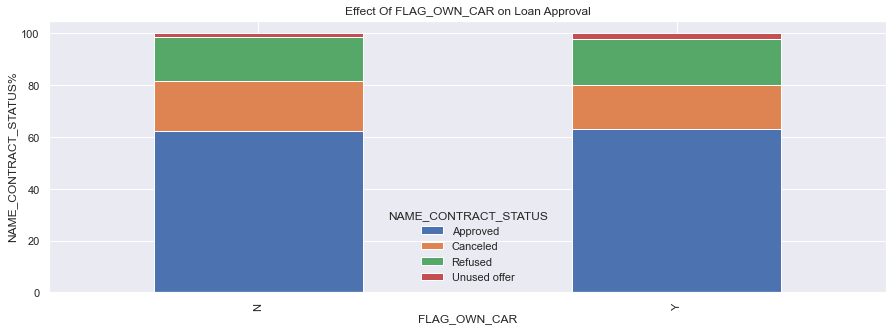

In [154]:
merge_plot('FLAG_OWN_CAR', 'NAME_CONTRACT_STATUS')

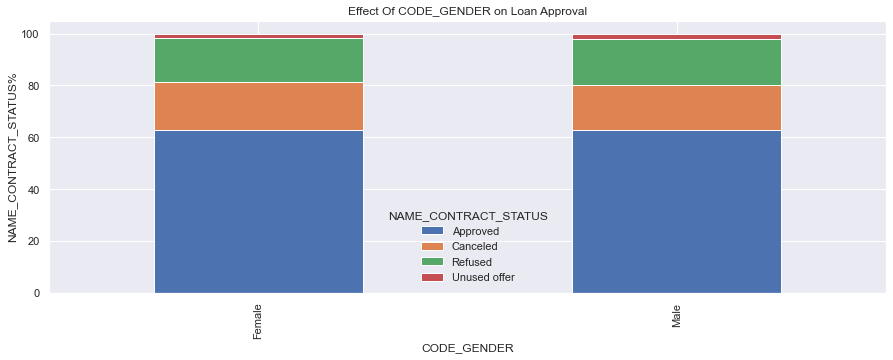

In [157]:
merge_plot('CODE_GENDER', 'NAME_CONTRACT_STATUS')

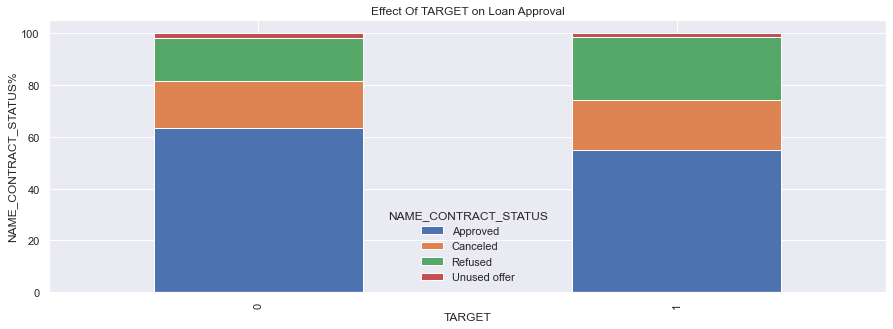

In [158]:
merge_plot('TARGET', 'NAME_CONTRACT_STATUS')

In [ ]:
# In above we can see thatWe can see that the people who were approved for a loan earlier,
# defaulted less often where as people who were refused a loan earlier have higher chances of defaulting.